# Big Mart Sales Prediction

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different locations. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

We have train and test data set, train data set has both input and output variable(s). We need to predict the sales for test data set. The columns in the train data set are:

- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

## Imports

In [213]:
# The necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [214]:
sales_train_df = pd.read_csv('bigmartsalesforecast/train.csv')

In [215]:
sales_train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [216]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8522 entries, 0 to 8521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8522 non-null   object 
 1   Item_Weight                7059 non-null   float64
 2   Item_Fat_Content           8522 non-null   object 
 3   Item_Visibility            8522 non-null   float64
 4   Item_Type                  8522 non-null   object 
 5   Item_MRP                   8522 non-null   float64
 6   Outlet_Identifier          8522 non-null   object 
 7   Outlet_Establishment_Year  8522 non-null   int64  
 8   Outlet_Size                6112 non-null   object 
 9   Outlet_Location_Type       8522 non-null   object 
 10  Outlet_Type                8522 non-null   object 
 11  Item_Outlet_Sales          8522 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


Let us also check the test data set.

In [217]:
sales_test_df = pd.read_csv('bigmartsalesforecast/test.csv')

In [218]:
sales_test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [219]:
sales_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


## EDA

In [220]:
sales_train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [221]:
sales_test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We can see that there are 1463 null values for Item_Weight column and 2410 null values for Outlet_Size column in the sales train data set and there are 976 null values for Item_Weight column and 1606 null values for Outlet_Size column in the sales test data set.

Since both the training set and the testing set have missing values, it is better if we combine both the train and test set into a single dataset and clean the data. Let us add a new column to both the data sets called Data_Purpose which can be set to 'train' for training data set and 'test' for testing data set and then concatenate both into a single set. Since the test set does not contain the 'Item_Outlet_Sales' column which is the target column, it will have null values once we concatenate it.

In [222]:
sales_train_df['Data_Purpose'] = 'train'
sales_test_df['Data_Purpose'] = 'test'
sales_df = pd.concat([sales_train_df, sales_test_df], ignore_index=True)

In [223]:
sales_train_df.shape

(8522, 13)

In [224]:
sales_test_df.shape

(5681, 12)

In [225]:
sales_df.shape

(14203, 13)

In [226]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14203 entries, 0 to 14202
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14203 non-null  object 
 1   Item_Weight                11764 non-null  float64
 2   Item_Fat_Content           14203 non-null  object 
 3   Item_Visibility            14203 non-null  float64
 4   Item_Type                  14203 non-null  object 
 5   Item_MRP                   14203 non-null  float64
 6   Outlet_Identifier          14203 non-null  object 
 7   Outlet_Establishment_Year  14203 non-null  int64  
 8   Outlet_Size                10187 non-null  object 
 9   Outlet_Location_Type       14203 non-null  object 
 10  Outlet_Type                14203 non-null  object 
 11  Item_Outlet_Sales          8522 non-null   float64
 12  Data_Purpose               14203 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [227]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Data_Purpose                    0
dtype: int64

The 'Item_Outlet_Sales column' has 5681 null values because that is from the test data. Now we observe that in all there are 2439 missing values from 'Item_Weight' feature and 4016 missing values from 'Outlet_Size' feature.

In [228]:
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11764.000000,14203.000000,14203.000000,14203.000000,8522.000000
mean,12.792684,0.065954,141.009592,1997.830740,2181.455027
std,4.652663,0.051460,62.086688,8.371956,1706.530835
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027035,94.027800,1987.000000,834.913200
50%,12.600000,0.054026,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Text(0.5, 1.0, 'Item Visibility vs Item Outlet Sales')

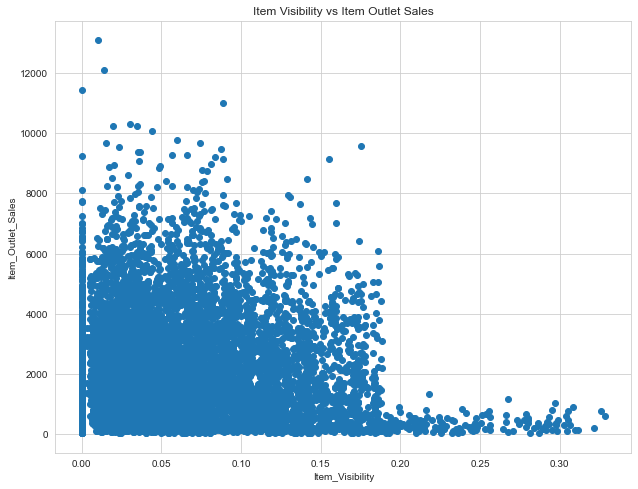

In [229]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
plt.scatter(x=sales_df['Item_Visibility'], y=sales_df['Item_Outlet_Sales'])
ax.set_xlabel('Item_Visibility')
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('Item Visibility vs Item Outlet Sales')

We can observe that items with visibility of less than 0.2 have the most sales. But we can also observe that there are many items with visibility 0.0 which does not make any sense. 

Let us see the number of unique values for each column in the dataset.

In [230]:
sales_df.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13031
Item_Type                       16
Item_MRP                      8169
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
Data_Purpose                     2
dtype: int64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

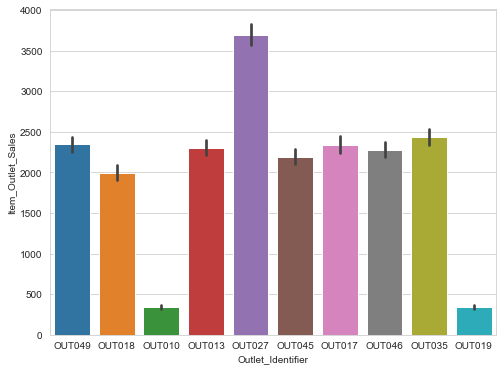

In [231]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=sales_df)

We can observe here that the top sales are for OUT027 which has significant higher sales than the other Outlet identifiers and the bottom two are OUT010 & OUT019 with the least sales which are significantly less than the other Outlets.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

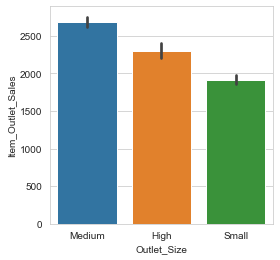

In [232]:
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=sales_df)

Here we see that the medium sized outlet has the maximum sales.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

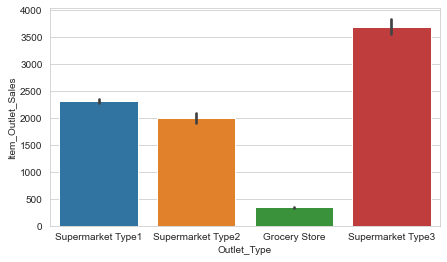

In [233]:
plt.figure(figsize=(7,4))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=sales_df)

We can observe that Grocery Store type of Outlet has the least sales which is very less than any type of Supermarket.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

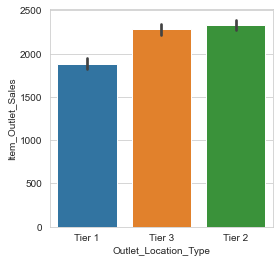

In [234]:
plt.figure(figsize=(4,4))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=sales_df)

The Outlet Location type of Tier 1 has lesser sales as compared to the other two tiers.

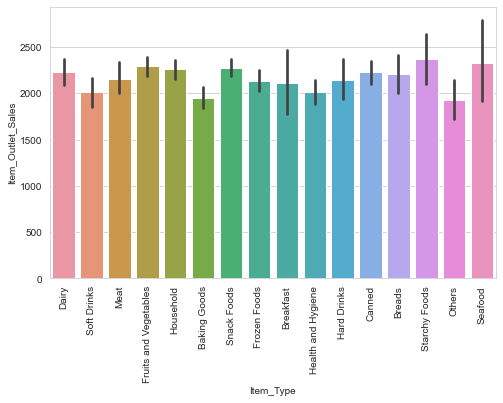

In [235]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=sales_df)
plt.xticks(rotation=90);

Starchy Foods have the maximum sales as compared to other item types.

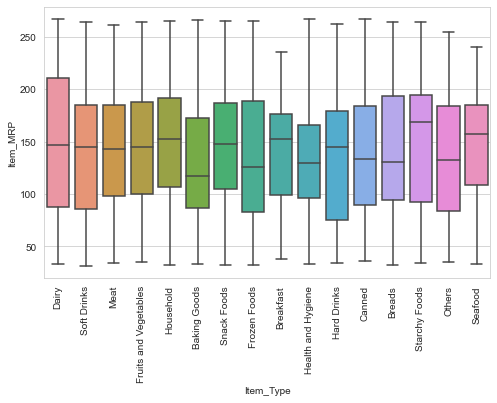

In [236]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.boxplot(x='Item_Type', y='Item_MRP', data=sales_df)
plt.xticks(rotation=90);

We do not see any outliers for any item type for the item's MRP range.

<AxesSubplot:>

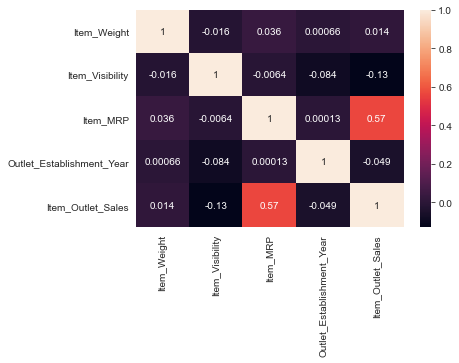

In [237]:
sns.heatmap(sales_df.corr(), annot=True)

If we try to see the correlation between the numerical features, we observe that the Item MRP is highly correlated to Item Outlet Sales.

<AxesSubplot:>

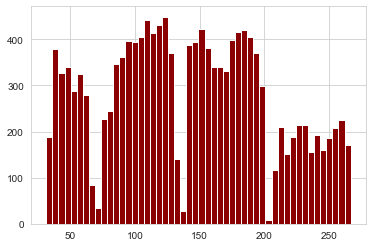

In [238]:
sales_df['Item_MRP'].hist(bins=50, color='darkred')

The sales are higher for MRP less than 200 but the sales of items more than 200 MRP are not significantly less.

## Data Cleaning

Let us also see what kind of values Item_Fat_Content and Item_Visibility contains.

In [239]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    8484
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [240]:
sales_df['Item_Visibility'].value_counts()

0.000000    879
0.077169      3
0.076483      3
0.076792      3
0.077290      3
           ... 
0.041943      1
0.026598      1
0.016824      1
0.020551      1
0.072360      1
Name: Item_Visibility, Length: 13031, dtype: int64

- **Item_Fat_Content has mismatched factor levels.**
- **Min(Item_visibility) = 0 in 879 rows which is practically possible. We should treat 0's as missing values.**
- **We have already observed that there are 2439 missing values from 'Item_Weight' feature and 4016 missing values from 'Outlet_Size' feature.**

In [241]:
Item_fat_content_map = {'Low Fat':'Low Fat','LF':'Low Fat','low fat':'Low Fat','Regular':'Regular','reg':'Regular'}
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].map(Item_fat_content_map)
sales_df['Item_Fat_Content'].value_counts()

Low Fat    9184
Regular    5019
Name: Item_Fat_Content, dtype: int64

We can fill the missing values for the Item_Weight column for each Item_Identifier with the mean value for that Item_Identifier.

In [242]:
sales_df['Item_Weight'] = sales_df['Item_Weight'].fillna(sales_df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [243]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Data_Purpose                    0
dtype: int64

We need to check how to fill the missing values for the Outlet_Size column.

Let us check for which of the Outlet_Identifier, the data for Outlet_Size is missing.

In [244]:
sales_df[sales_df['Outlet_Size'].isnull()==True]['Outlet_Identifier'].value_counts()

OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64

We see that there are 3 Outlet Identifiers which have null value for the Outlet Size. Let us check the other column values and see if there is any relationship between other columns and Outlet_Size column.

In [245]:
sales_df[sales_df['Outlet_Identifier']=='OUT045'][['Outlet_Location_Type','Outlet_Type']].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 2                Supermarket Type1    1548
dtype: int64

In [246]:
sales_df[sales_df['Outlet_Identifier']=='OUT017'][['Outlet_Location_Type','Outlet_Type']].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 2                Supermarket Type1    1543
dtype: int64

In [247]:
sales_df[sales_df['Outlet_Identifier']=='OUT010'][['Outlet_Location_Type','Outlet_Type']].value_counts()

Outlet_Location_Type  Outlet_Type  
Tier 3                Grocery Store    925
dtype: int64

We can clearly observe the relationship between the Outlet_Location_Type column, the Outlet_Type column to the Outlet_Identifier column. Let us check for the same Outlet_Location_Type and the Outlet_Type what are types of Outlet_Size.

In [248]:
sales_df[(sales_df['Outlet_Location_Type']=='Tier 2') & (sales_df['Outlet_Type']=='Supermarket Type1')]['Outlet_Size'].value_counts()

Small    1550
Name: Outlet_Size, dtype: int64

In [249]:
sales_df[(sales_df['Outlet_Location_Type']=='Tier 3') & (sales_df['Outlet_Type']=='Grocery Store')]['Outlet_Size'].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

In [250]:
sales_df[sales_df['Outlet_Location_Type']=='Tier 1'][['Outlet_Type','Outlet_Size']].value_counts()

Outlet_Type        Outlet_Size
Supermarket Type1  Medium         1550
                   Small          1549
Grocery Store      Small           880
dtype: int64

In [251]:
sales_df[sales_df['Outlet_Location_Type']=='Tier 2'][['Outlet_Type','Outlet_Size']].value_counts()

Outlet_Type        Outlet_Size
Supermarket Type1  Small          1550
dtype: int64

In [252]:
sales_df[sales_df['Outlet_Location_Type']=='Tier 3'][['Outlet_Type','Outlet_Size']].value_counts()

Outlet_Type        Outlet_Size
Supermarket Type3  Medium         1559
Supermarket Type1  High           1553
Supermarket Type2  Medium         1546
dtype: int64

From this we observe that the Grocery Store type of Outlet_Type has always Outlet_Size of small. So we can fill the null values in the Outlet_Size column for OUT010 Outlet_Identifier with 'Small'.

In [253]:
grocery_map = {'Grocery Store':'Small'}
grocery_sales_df = sales_df['Outlet_Type'].map(grocery_map)
sales_df['Outlet_Size'] = sales_df['Outlet_Size'].combine_first(grocery_sales_df)

In [254]:
sales_df[sales_df['Outlet_Identifier']=='OUT010']['Outlet_Size'].value_counts()

Small    925
Name: Outlet_Size, dtype: int64

We have seen that when the Outlet_Type is Supermarket Type1 and the Outlet_Location_Type is Tier2 then the Outlet_Size is Small for the outlets which do not have null values. Let us see the dependency of Outlet_Size, Outlet_Location_Type and Outlet_Type.

In [255]:
outlet_crosstab_loc = pd.crosstab(sales_df['Outlet_Size'], sales_df['Outlet_Location_Type'])
outlet_crosstab_loc

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2429,1550,925


In [256]:
outlet_crosstab_type = pd.crosstab(sales_df['Outlet_Type'], sales_df['Outlet_Location_Type'])
outlet_crosstab_type

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,880,0,925
Supermarket Type1,3099,4641,1553
Supermarket Type2,0,0,1546
Supermarket Type3,0,0,1559


Let us now map the OUT045 and OUT017 Outlet_Identifiers with the Outlet_Size of 'Small'.

In [257]:
outletid_map = {'OUT045':'Small','OUT017':'Small'}
Outletid_df = sales_df['Outlet_Identifier'].map(outletid_map)
sales_df['Outlet_Size'] = sales_df['Outlet_Size'].combine_first(Outletid_df)

In [258]:
sales_df[sales_df['Outlet_Identifier']=='OUT045']['Outlet_Size'].value_counts()

Small    1548
Name: Outlet_Size, dtype: int64

In [259]:
sales_df[sales_df['Outlet_Identifier']=='OUT017']['Outlet_Size'].value_counts()

Small    1543
Name: Outlet_Size, dtype: int64

In [260]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Data_Purpose                    0
dtype: int64

Now we have removed all the null values in the sales_df features. We still need to handle the 0.0 values for the Item_Visibility feature. We can handle this by calculating the mean of the Item_Visibility and fill the mean value in the place of 0.0 values.

In [261]:
visibility_avg = sales_df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [262]:
visibility_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [263]:
sales_df['Item_Visibility'].replace(to_replace=0.000000,value=np.NaN,inplace=True)

In [264]:
sales_df['Item_Visibility'].isnull().sum()

879

In [265]:
sales_df['Item_Visibility'] = sales_df['Item_Visibility'].fillna(sales_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [266]:
sales_df['Item_Visibility'].isnull().sum()

0

## Feature Engineering

Let us see what are the categorical features in the Big Mart sales data.

In [267]:
sales_df.select_dtypes(include=[np.object]).head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Data_Purpose
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train


Observe the variable Item_Identifier and find that its value starts with FD, DR, NC, namely Food, Drinks and Non-Consumables. You can use this variable to create a new variable Item_Type_Combined:

In [268]:
sales_df['Item_Identifier'].apply(lambda x: x[0:2]).value_counts()

FD    10201
NC     2686
DR     1316
Name: Item_Identifier, dtype: int64

In [269]:
sales_df['Item_Type_Generic'] = sales_df['Item_Identifier'].apply(lambda x:x[0:2])
sales_df['Item_Type_Generic'] = sales_df['Item_Type_Generic'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drink'})
sales_df['Item_Type_Generic'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1316
Name: Item_Type_Generic, dtype: int64

In [271]:
sales_df.loc[sales_df['Item_Type_Generic']=='Non-Consumable','Item_Fat_Content'].value_counts()

Low Fat    2686
Name: Item_Fat_Content, dtype: int64

If the Item_Type is non-consumable then it cannot be categorized as Low Fat. Let us change this to something meaningful.

In [272]:
sales_df.loc[sales_df['Item_Type_Generic']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'

In [273]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat       6498
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

### Converting Categorical Features

We'll need to convert categorical features to dummy variables.

In [274]:
item_fat = pd.get_dummies(sales_df['Item_Fat_Content'])
item_fat

,Low Fat,Non-Edible,Regular
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
14198,0,0,1
14199,0,0,1
14200,0,1,0
14201,0,0,1


In [275]:
item_type_generic = pd.get_dummies(sales_df['Item_Type_Generic'])
item_type_generic

,Drink,Food,Non-Consumable
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
14198,0,1,0
14199,0,1,0
14200,0,0,1
14201,0,1,0


In [276]:
outlet_size = pd.get_dummies(sales_df['Outlet_Size'])
outlet_size

,High,Medium,Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
14198,0,0,1
14199,0,1,0
14200,0,0,1
14201,0,0,1


In [277]:
outlet_location_type = pd.get_dummies(sales_df['Outlet_Location_Type'])
outlet_location_type

,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
14198,1,0,0
14199,0,0,1
14200,0,1,0
14201,0,1,0


In [278]:
outlet_type = pd.get_dummies(sales_df['Outlet_Type'])
outlet_type

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
14198,0,1,0,0
14199,0,0,1,0
14200,0,1,0,0
14201,0,1,0,0


In [279]:
sales_df.drop(['Item_Fat_Content','Item_Type_Generic','Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1, inplace=True)

In [280]:
sales_df = pd.concat([sales_df, item_fat, item_type_generic, outlet_size, outlet_location_type, outlet_type], axis=1)
sales_df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Data_Purpose,Low Fat,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.93,0.014670,Household,53.8614,OUT013,1987,994.7052,train,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14198,FDB58,10.50,0.013496,Snack Foods,141.3154,OUT046,1997,NaN,test,0,...,0,0,1,1,0,0,0,1,0,0
14199,FDD47,7.60,0.142991,Starchy Foods,169.1448,OUT018,2009,NaN,test,0,...,0,1,0,0,0,1,0,0,1,0
14200,NCO17,10.00,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,test,0,...,0,0,1,0,1,0,0,1,0,0
14201,FDJ26,15.30,0.098200,Canned,214.6218,OUT017,2007,NaN,test,0,...,0,0,1,0,1,0,0,1,0,0


We still need to drop Item_Type, Item_Identifier, Outlet_Identifier.
We also need to convert the Outlet_Establishment_Year to number of years since established.

In [281]:
sales_df['outlet_years'] = 2013-sales_df['Outlet_Establishment_Year']
sales_df['outlet_years']

0        14
1         4
2        14
3        15
4        26
         ..
14198    16
14199     4
14200    11
14201     6
14202    11
Name: outlet_years, Length: 14203, dtype: int64

In [282]:
sales_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Data_Purpose', 'Low Fat', 'Non-Edible', 'Regular',
       'Drink', 'Food', 'Non-Consumable', 'High', 'Medium', 'Small', 'Tier 1',
       'Tier 2', 'Tier 3', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3', 'outlet_years'],
      dtype='object')

In [283]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Data_Purpose,Low Fat,...,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,outlet_years
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1,...,1,0,1,0,0,0,1,0,0,14
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,1,0,0,0,1,0,0,1,0,4
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1,...,1,0,1,0,0,0,1,0,0,14
3,FDX07,19.20,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0,...,0,1,0,0,1,1,0,0,0,15
4,NCD19,8.93,0.014670,Household,53.8614,OUT013,1987,994.7052,train,0,...,0,0,0,0,1,0,1,0,0,26


In [284]:
sales_df.drop(['Item_Type','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis=1, inplace=True)

In [285]:
sales_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Data_Purpose,Low Fat,Non-Edible,Regular,Drink,Food,...,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,outlet_years
0,9.30,0.016047,249.8092,3735.1380,train,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,14
1,5.92,0.019278,48.2692,443.4228,train,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,4
2,17.50,0.016760,141.6180,2097.2700,train,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,14
3,19.20,0.022930,182.0950,732.3800,train,0,0,1,0,1,...,0,1,0,0,1,1,0,0,0,15
4,8.93,0.014670,53.8614,994.7052,train,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,26


Now, since all the categorical features have been converted to numerical, we can divide the data back to train and test sets and remove the Data_Purpose column.

In [286]:
sales_train_df = sales_df[sales_df['Data_Purpose']=='train'].copy()

In [287]:
sales_test_df = sales_df[sales_df['Data_Purpose']=='test'].copy()

In [288]:
sales_train_df.shape

(8522, 22)

In [289]:
sales_test_df.drop('Data_Purpose', axis=1, inplace=True)

In [290]:
sales_test_df.shape

(5681, 21)

In [291]:
sales_train_df.drop('Data_Purpose', axis=1, inplace=True)

Now the data is ready for our model.

## Building a model
Let's start by splitting our data into a training set and test set.

### Train Test Split

We will split from the sales_train_df into train and test set for training our model using train set and to validate the model using the test set.

We will later use the sales_test_df to predict the values of the Item_Outlet_Sales.

In [292]:
X = sales_train_df.drop('Item_Outlet_Sales',axis=1)
y = sales_train_df['Item_Outlet_Sales']

In [293]:
from sklearn.model_selection import train_test_split

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

### Linear Regression Model

In [295]:
from sklearn.linear_model import LinearRegression

In [296]:
lm = LinearRegression()

In [297]:
lm.fit(X_train,y_train)

LinearRegression()

In [298]:
print('Coefficients:\n ',lm.coef_)

Coefficients:
  [ 8.47735083e-01 -4.15566598e+02  1.54264355e+01 -1.60963329e+01
 -1.17822897e+01  2.78786226e+01 -2.86782788e+00  1.46501176e+01
 -1.17822897e+01  3.51246729e+02 -1.28954777e+02 -2.22291952e+02
  1.15678253e+02  6.18943501e+01 -1.77572604e+02 -1.59185857e+03
 -7.90132186e+00 -3.08619418e+02  1.90837931e+03 -2.20676882e+01]


**Predictions using Linear Regression**

Now that we have fit our model, let's evaluate its performance by predicting off the X_test values!

In [299]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions Y')

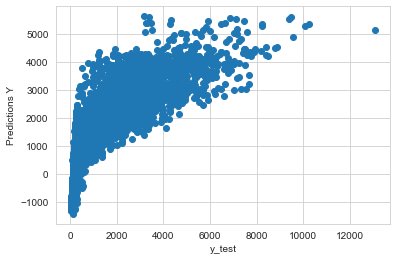

In [300]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions Y')

### Regression Evaluation Metrics

In [301]:
from sklearn import metrics

In [302]:
MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)

In [303]:
print('MAE: ',MAE)
print('MSE: ',MSE)
print('RMSE: ',RMSE)

MAE:  833.9607154922544
MSE:  1262558.8788831988
RMSE:  1123.63645316588


### Decision Tree Model

In [304]:
from sklearn.tree import DecisionTreeRegressor

In [305]:
dtree = DecisionTreeRegressor()

In [306]:
sales_dtree_model = dtree.fit(X_train, y_train)

**Predictions for Decision Tree Regressor**

In [307]:
predictions = dtree.predict(X_test)

**Evaluation Metrics**

In [308]:
MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)

In [309]:
print('MAE: ',MAE)
print('MSE: ',MSE)
print('RMSE: ',RMSE)

MAE:  1099.771147985921
MSE:  2436017.332816883
RMSE:  1560.7745938529633


### Random Forest Model

In [310]:
from sklearn.ensemble import RandomForestRegressor

In [311]:
rfr = RandomForestRegressor(n_estimators=100)

In [312]:
sales_rfr_model = rfr.fit(X_train, y_train)

**Predictions for Random Forest Regressor**

In [313]:
predictions = rfr.predict(X_test)

**Evaluation Metrics**

In [314]:
MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)

In [315]:
print('MAE: ',MAE)
print('MSE: ',MSE)
print('RMSE: ',RMSE)

MAE:  793.79473557763
MSE:  1272183.6653208253
RMSE:  1127.9111956713725


**We observe that the MAE and RMSE does not improve for Decision Tree Regressor, but the Random Forest Regressor gives similar results as Linear Regression Model.**